In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yashnegi2209","key":"76d034c908bdcc2e64660fb37c751d9f"}'}

In [ ]:
import os
print(os.listdir('.'))

['.config', 'kaggle.json', 'sample_data']


In [ ]:
kaggle_dir = '/root/.kaggle'
os.makedirs(kaggle_dir, exist_ok=True)

# Adjusted to copy the file from the current working directory
!cp ./kaggle.json {kaggle_dir}/
!chmod 600 {kaggle_dir}/kaggle.json

In [ ]:
! kaggle datasets download ealaxi/paysim1

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 91% 162M/178M [00:02<00:00, 82.2MB/s]
100% 178M/178M [00:02<00:00, 78.7MB/s]


In [ ]:
!unzip paysim1.zip

Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
!rm paysim1.zip

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
%pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15897 sha256=2507f8c58c82a0e0923bc2a9878a347a394b15b87028787b3b1f775ac5082968
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [ ]:
import pyforest

In [ ]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [ ]:
df.shape

(6362620, 11)

- Here, I are dropping nameOrig because it has mostly unique values.

In [ ]:
df.drop(['nameOrig'], inplace=True, axis=1)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Univariate Analysis
(Considering one parameter at a time)

In [ ]:
import matplotlib.pyplot as plt

### To show the types of Transactions made in our dataset and their frequency

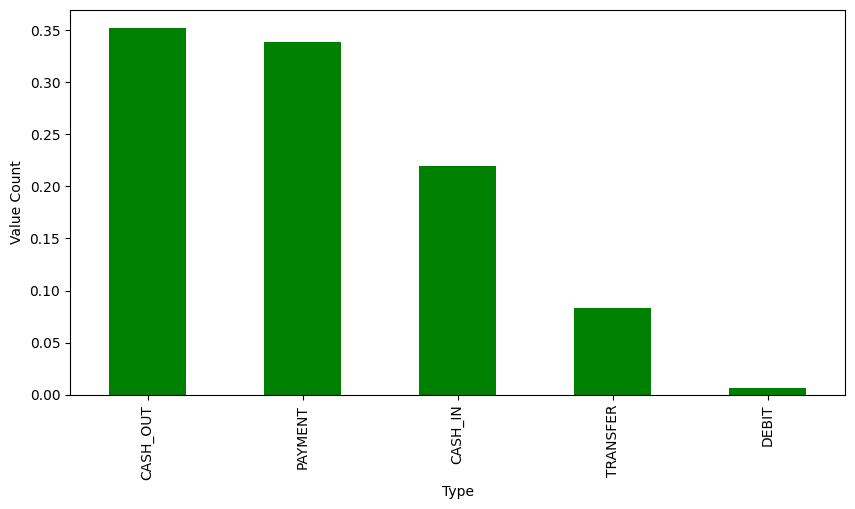

In [ ]:
fig = plt.figure(figsize=(10, 5))
df['type'].value_counts(normalize=True).plot(kind='bar', color='green')
plt.xlabel("Type")
plt.ylabel("Value Count")
plt.show()

### To detect any outliers in the dataset

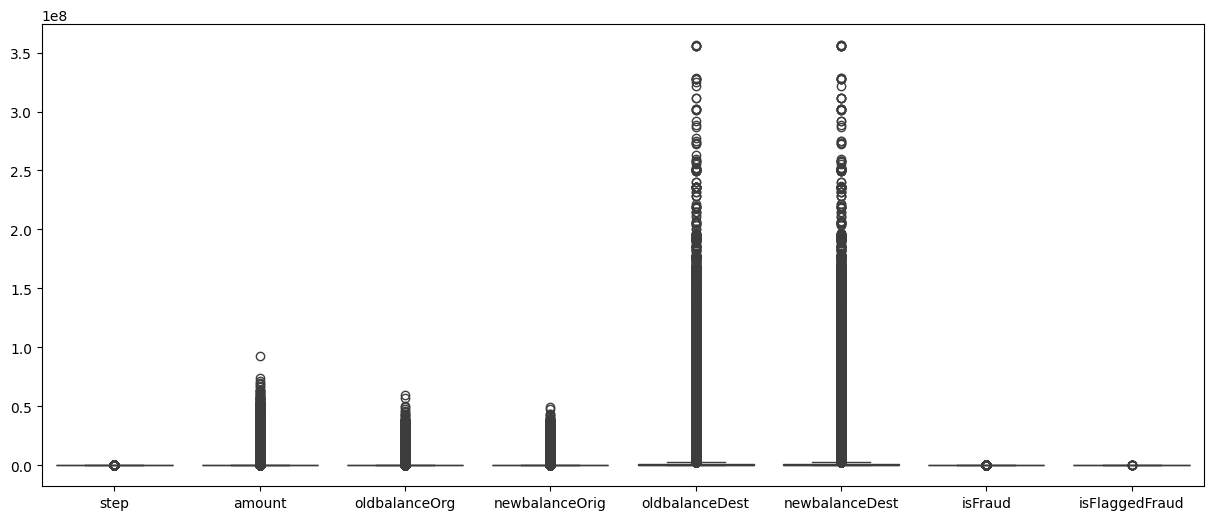

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.show()

### This boxplot shows the distribution of numerical columns in your DataFrame, where:
- Each column has its data visualized as a boxplot.
- The black circles or points outside the whiskers represent outliers.

## Key Observations About Outliers:
### Presence of Outliers:
- There are outliers in multiple columns, especially amount, oldbalanceDest, and newbalanceDest, as indicated by the points outside the whiskers.
- These outliers indicate extreme values in these variables that deviate significantly from the majority of the data.

### Columns Without Significant Outliers:
- Columns like step and isFraud appear to have fewer or no visible outliers, as most points are within the whiskers.

### Scale of Outliers:
- Columns such as oldbalanceDest and newbalanceDest show very high extreme values (as evident from their position on the y-axis). This suggests that the data in these columns might require further investigation, normalization, or handling if these extreme values distort analysis.

In [ ]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


<Axes: xlabel='isFraud', ylabel='count'>

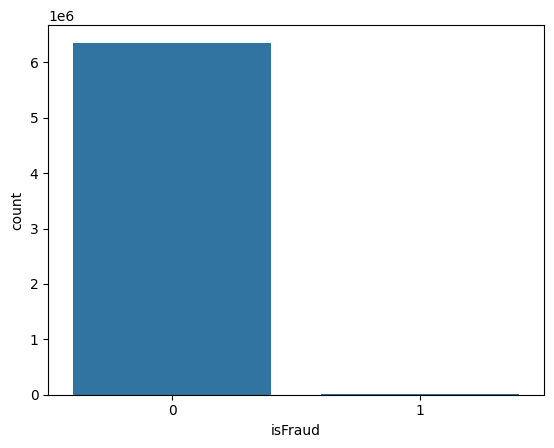

In [ ]:
sns.countplot(data=df, x="isFraud")

In [ ]:
# Check class imbalance
class_distribution = df['isFraud'].value_counts(normalize=True) * 100
print("Class distribution (%):\n", class_distribution)

Class distribution (%):
 isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


# Bivariate Analysis

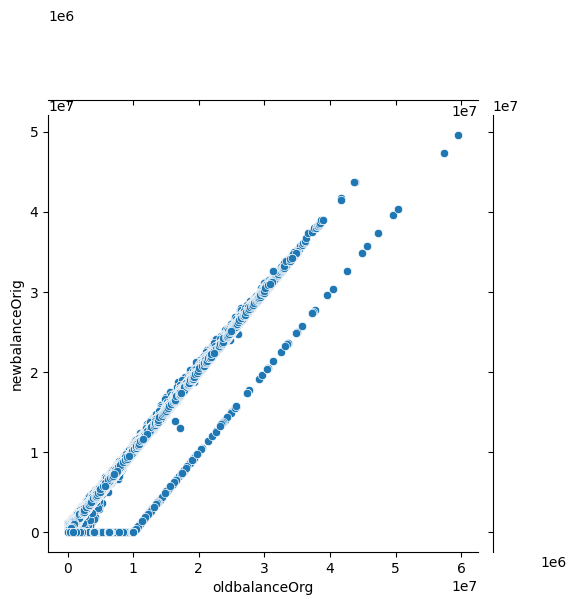

In [ ]:
sns.jointplot(x="oldbalanceOrg", y="newbalanceOrig", data=df)

The plot shown is a jointplot generated using Seaborn, which provides a scatter plot to visualize the relationship between two numerical variables, oldbalanceOrg and newbalanceOrig.

###Observations:
- Linear Relationship: The points appear to align along two distinct diagonal lines, suggesting that newbalanceOrig is related to oldbalanceOrg with some linear patterns or constraints.
The primary line along y=x indicates cases where the newbalanceOrig and oldbalanceOrg values are nearly identical, likely reflecting transactions where balances were unchanged.
- Clustered Points: Most data points are concentrated near the origin (lower values of oldbalanceOrg and newbalanceOrig), suggesting that many transactions involve smaller balances.
- Outliers or Exceptions: There are points deviating from the y=x line and forming another line. This may reflect cases where a transaction led to a specific balance update rule (e.g., partial withdrawals, zero balances, or fraud detection thresholds).

###Possible Interpretations:
- Transaction Consistency: If this data represents transactions, it could indicate that the newbalanceOrig is derived directly from oldbalanceOrg following certain rules.
For example, a transaction may deduct a fixed or proportional amount from oldbalanceOrg to yield newbalanceOrig.
- Outliers or Fraud Detection: The points diverging from the primary pattern could signify transactions that didn't follow the usual rules, which might need further analysis for anomalies or fraud.

# Multivariate Analysis

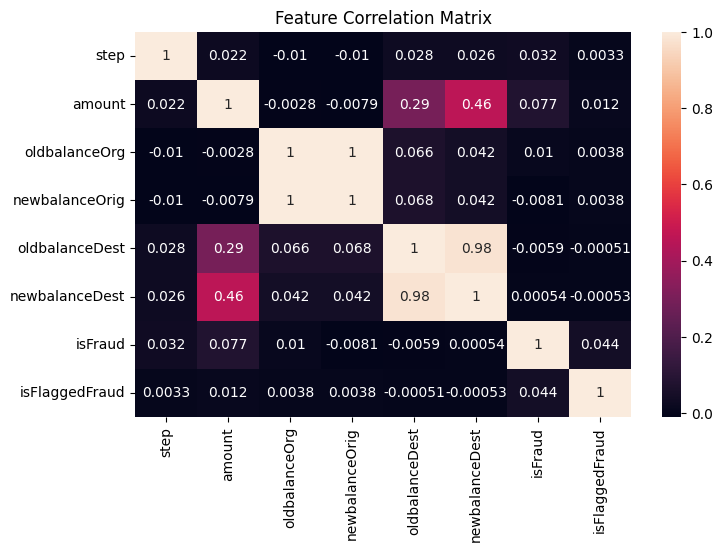

In [ ]:
# Compute correlation matrix
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Data Preprocessing

In [ ]:
df.nunique()

,0
step,743
type,5
amount,5316900
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2
isFlaggedFraud,2


In [ ]:
df.shape

(6362620, 10)

- We have already dropped nameOrig because it has mostly unique values.
- Coming on to nameDest, not all values are unique. But we can analyse that if the frequency of a particular destination is more and it is fraud, then it is useful for us. Otherwise if the correlation btw freq of nameDest and isFraud is less, i.e., close to 0, then we can remove it.

In [ ]:
# Frequency encoding for nameDest
df['freq_nameDest'] = df['nameDest'].map(df['nameDest'].value_counts());

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,freq_nameDest
0,1,PAYMENT,9839.64,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,181.0,0.00,C553264065,0.0,0.0,1,0,44
3,1,CASH_OUT,181.00,181.0,0.00,C38997010,21182.0,0.0,1,0,41
4,1,PAYMENT,11668.14,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [ ]:
df[['freq_nameDest', 'isFraud']].corr()

,freq_nameDest,isFraud
freq_nameDest,1.000000,-0.008982
isFraud,-0.008982,1.000000


- Similarly check the correlation between isFlaggedFraud and isFraud

In [ ]:
df[['isFlaggedFraud', 'isFraud']].corr()

,isFlaggedFraud,isFraud
isFlaggedFraud,1.000000,0.044109
isFraud,0.044109,1.000000


In [ ]:
df.drop(['freq_nameDest', 'nameDest', 'isFlaggedFraud', 'step'], axis=1, inplace=True)
# Removing all unnecessary elements;
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [ ]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


### Removal of Outliers

In [ ]:
from scipy import stats

# Identify numerical columns
num = [var for var in df.columns if df[var].dtype in ['int64', 'float64'] and var != 'isFraud']

# Calculate z-scores for all numerical columns
z_scores = stats.zscore(df[num])

# Create a boolean mask for rows where all z-scores are within the threshold
mask = (np.abs(z_scores) <= 3).all(axis=1)

# Apply the mask to filter the dataset
df = df[mask]


<IPython.core.display.Javascript object>

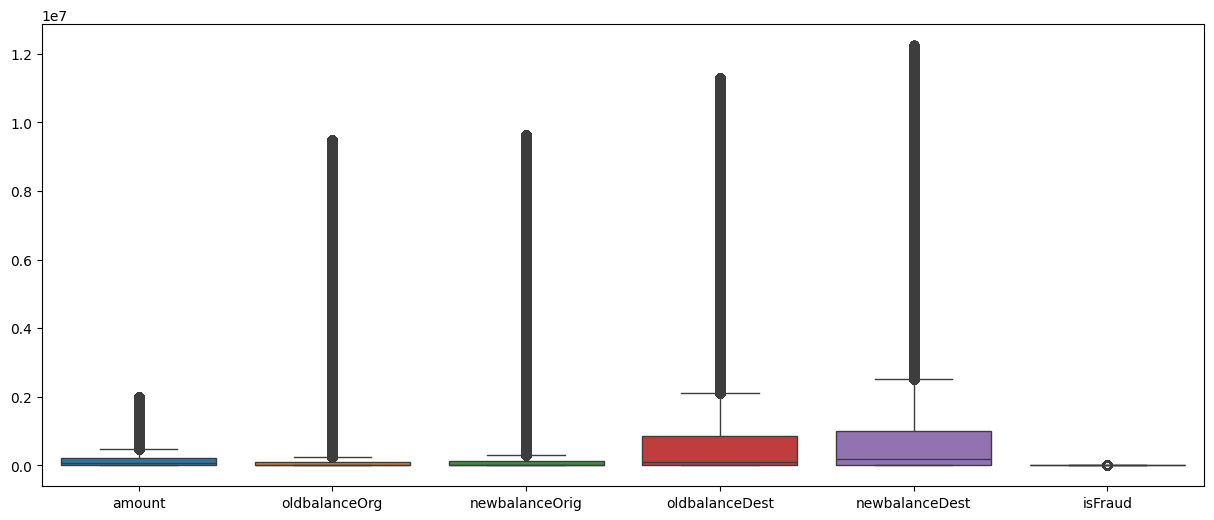

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["type"]=le.fit_transform(df["type"])

In [ ]:
df["type"].value_counts()

,count
type,
1,2200551
3,2151463
0,1221669
4,476173
2,40733


In [ ]:
x=df.drop("isFraud", axis=1)
y=df["isFraud"]

In [ ]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
2,4,181.00,181.0,0.00,0.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0


In [ ]:
y.head()

,isFraud
0,0
1,0
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=13, test_size=0.2)

In [ ]:
%pip install xgboost
import xgboost as xgb
final_model = xgb.XGBClassifier()
final_model.fit(x_train, y_train)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 3.6 MB/s eta 0:00:00


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Make predictions on test set
y_test_pred = final_model.predict(x_test)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.9996453545551416
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1216808
           1       0.95      0.71      0.81      1310

    accuracy                           1.00   1218118
   macro avg       0.97      0.86      0.91   1218118
weighted avg       1.00      1.00      1.00   1218118



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores: [0.9996002  0.99965931 0.99967491 0.99968394 0.99964782]
Mean Accuracy: 0.9996532355072032


In [ ]:
import numpy as np
x_test_noisy = x_test + np.random.normal(0, 0.01, size=x_test.shape)
y_test_noisy_pred = final_model.predict(x_test_noisy)
print("Accuracy with noise:", accuracy_score(y_test, y_test_noisy_pred))


Accuracy with noise: 0.9994048195659205


In [ ]:
x_test_high_noise = x_test + np.random.normal(0, 0.05, size=x_test.shape)
y_test_high_noise_pred = final_model.predict(x_test_high_noise)
print("Accuracy with higher noise:", accuracy_score(y_test, y_test_high_noise_pred))


Accuracy with higher noise: 0.999403177688861


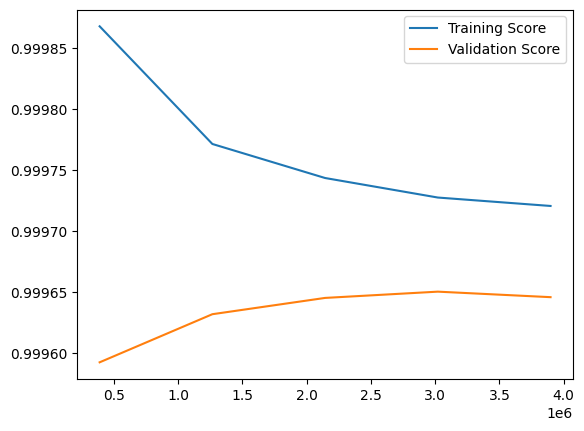

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    final_model, x_train, y_train, cv=5, scoring='accuracy'
)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Validation Score")
plt.legend()
plt.show()


In [ ]:
import numpy as np

manual_inputs = [
    np.array([[3, 31613.13, 0, 0, 0, 0]]),
    np.array([[1, 1619313.55, 1619313.55, 0, 0, 1619313.55]]),
    np.array([[1, 1619313.55, 1619313.55, 0, 0, 1619313.55]]),
    np.array([[4, 253846.98, 0, 0, 1999285.44, 2495902.89]]),
    np.array([[4, 1076518.28, 1076518.28, 0, 0, 0]]),
    np.array([[0, 172150.6, 267515, 439665.6, 690546.43, 518395.83]])
]

for i, manual_input in enumerate(manual_inputs, start=1):
    prediction = final_model.predict(manual_input)  # Predict for each input
    result = "Fraud" if prediction[0] == 1 else "Non-Fraud"
    print(f"Prediction {i}:", result)


Prediction 1: Non-Fraud
Prediction 2: Fraud
Prediction 3: Fraud
Prediction 4: Non-Fraud
Prediction 5: Fraud
Prediction 6: Non-Fraud
